#**TALLER 7  PARTE II**
###**TRANSFER LEARNING**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(
    include_top = False,
    weights = "imagenet",
    input_shape = (128, 128, 3)
)
base_model.trainable = False

input = tf.keras.Input((128, 128, 3))
x = base_model(input)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(160, activation='relu')(x)
output = tf.keras.layers.Dense(3, activation="softmax")(x)

transfer_learning_model = tf.keras.Model(input, output)

In [ ]:
transfer_learning_model.compile(optimizer="adam",
                                loss='sparse_categorical_crossentropy',
                                metrics=['accuracy'])

CB = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)
]

history = transfer_learning_model.fit(
    train_data_augmenter.flow(X_train, y_train, subset="training"),
    validation_data = train_data_augmenter.flow(X_train, y_train, subset="validation"),
    validation_split=0.2,
    epochs = 15,
    callbacks = CB,
    batch_size = 32,
    validation_batch_size = 32
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 234ms/step - accuracy: 0.4953 - loss: 1.3058 - val_accuracy: 0.7733 - val_loss: 0.5409
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.7815 - loss: 0.5345 - val_accuracy: 0.7533 - val_loss: 0.5955
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.8215 - loss: 0.4172 - val_accuracy: 0.7683 - val_loss: 0.5558
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.8149 - loss: 0.4307 - val_accuracy: 0.8350 - val_loss: 0.3828
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 211ms/step - accuracy: 0.8732 - loss: 0.3239 - val_accuracy: 0.7833 - val_loss: 0.4574
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step - accuracy: 0.8549 - loss: 0.3497 - val_accuracy: 0.8183 - val_loss: 0.4397
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.8598 - loss: 0.3342 - val_accuracy: 0.8417 - val_loss: 0.4015
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 186ms/step - accuracy: 0.9004 - loss: 0.2627 - val_accuracy: 0.851

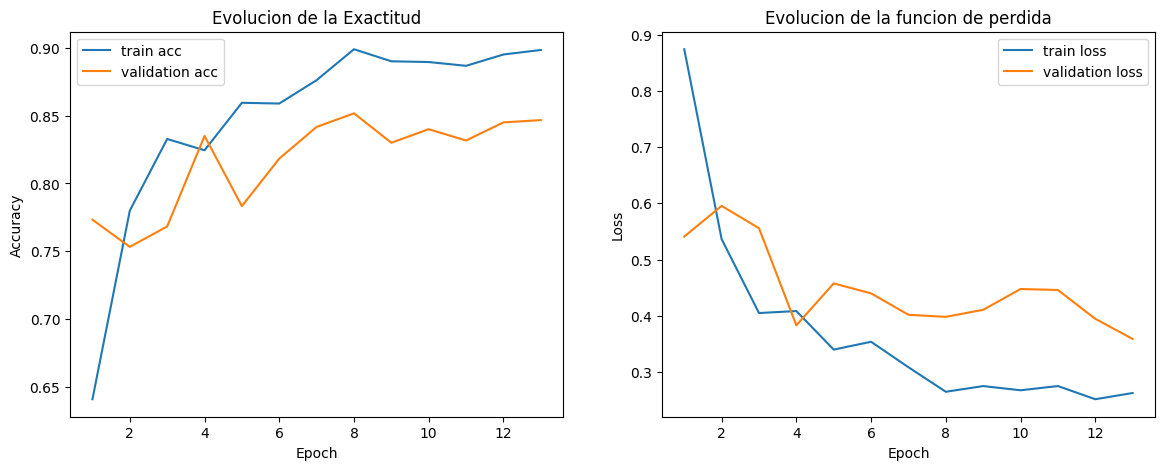

In [ ]:
# graficas de la evolucion del acurracy y loss
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

history = history.history
epochs = range(1, len(history["accuracy"]) + 1)

# plot acurracy
ax1.plot(epochs, history["accuracy"], label="train acc")
ax1.plot(epochs, history["val_accuracy"], label="validation acc")

ax1.legend()
ax1.set_title("Evolucion de la Exactitud")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")


# plot loss
ax2.plot(epochs, history["loss"], label="train loss")
ax2.plot(epochs, history["val_loss"], label="validation loss")

ax2.legend()
ax2.set_title("Evolucion de la funcion de perdida")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")

plt.show()


ENTRENAMIENTO Y VALIDACION:

75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       800
           1       0.96      0.97      0.97       800
           2       0.90      0.89      0.90       800

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400


PRUEBA:

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       200
           1       0.91      0.96      0.94       200
           2       0.85      0.81      0.83       200

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



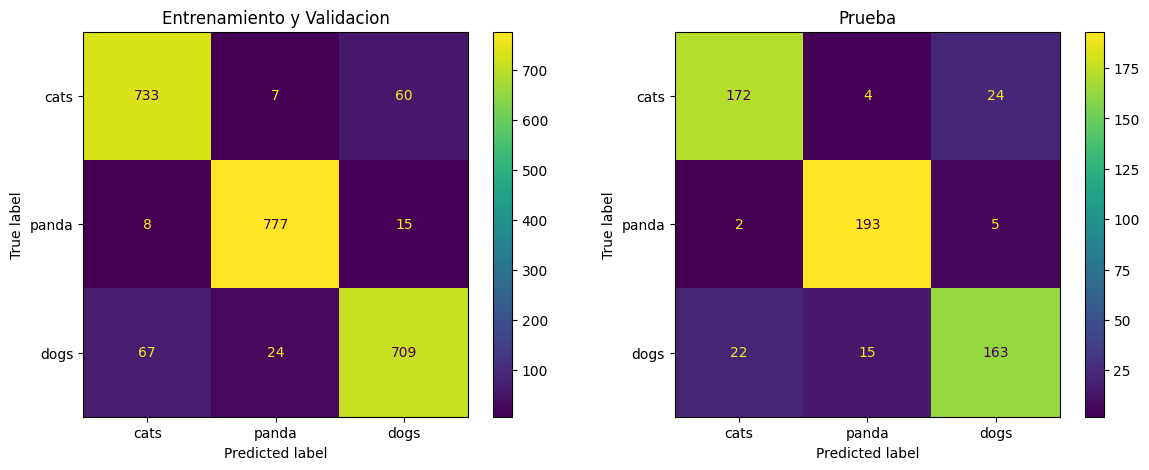

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

print("\nENTRENAMIENTO Y VALIDACION:\n")

y_pred = np.argmax(transfer_learning_model.predict(X_train), axis=1)

print(classification_report(y_train, y_pred))
ConfusionMatrixDisplay.from_predictions(
    y_true = y_train,
    y_pred = y_pred,
    display_labels = clases,
    ax = ax1
)
ax1.set_title("Entrenamiento y Validacion")

print("\nPRUEBA:\n")

y_pred = np.argmax(transfer_learning_model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(
    y_true = y_test,
    y_pred = y_pred,
    display_labels = clases,
    ax = ax2
)
ax2.set_title("Prueba")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


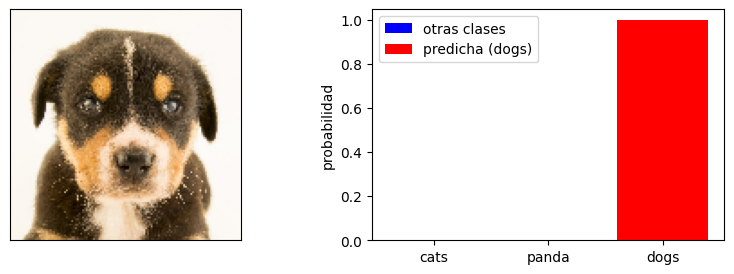

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


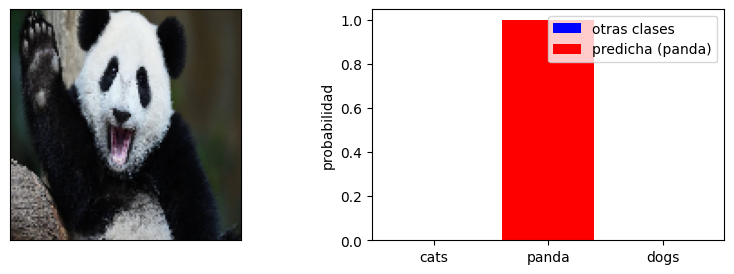

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


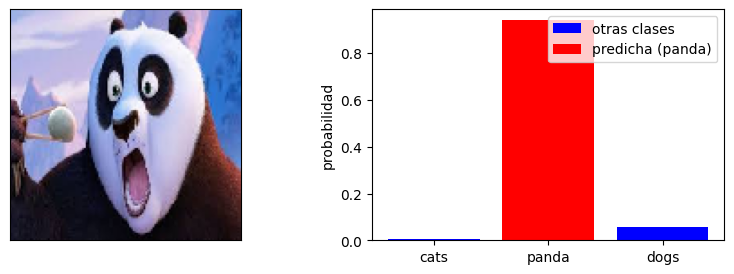

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


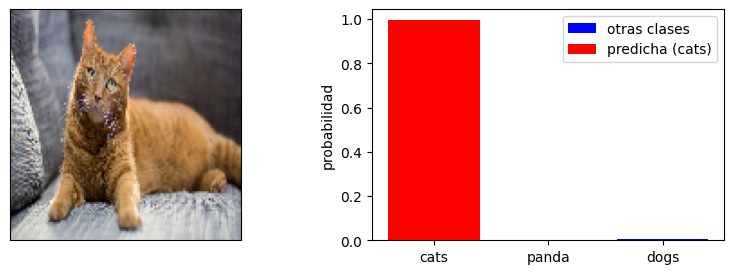

In [ ]:
import requests
import tempfile

url_list = ['https://i.natgeofe.com/n/4f5aaece-3300-41a4-b2a8-ed2708a0a27c/domestic-dog_thumb_square.jpg',
            'https://elcomercio.pe/resizer/9DJqJfQpcy7yKlXNeNqpcLF9Ul8=/980x528/smart/filters:format(jpeg):quality(75)/cloudfront-us-east-1.images.arcpublishing.com/elcomercio/76ARO4YS45HF5CILG36RIATXUE.jpg',
            'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6UIbP4KZBP_Nv5JK5LIsTjUeTVKbjlXVvcA&s',
            'https://www.cdc.gov/healthy-pets/media/images/2024/04/Cat-on-couch.jpg',
]

for url in url_list:
    response = requests.get(url)

    with tempfile.NamedTemporaryFile() as f:
        f.write(response.content)
        f.seek(0)

        imagen = tf.keras.preprocessing.image.load_img(
            path = f.name,
            color_mode = "rgb",
            target_size = (128, 128)
        )
        imagen = tf.keras.preprocessing.image.img_to_array(imagen) / 255

        plot_imagen_classification(transfer_learning_model, imagen, clases)



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

In [ ]:
base_model2 = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)
base_model2.trainable = False
input = tf.keras.Input(shape=(128,128,3))
x = base_model2(input)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(160, activation='relu')(x)
output = tf.keras.layers.Dense(3, activation="softmax")(x)
transfer_learning_model2 = tf.keras.Model(input, output)

In [ ]:
X_train = tf.keras.applications.resnet50.preprocess_input(
    X_train, data_format=None
)
X_test = tf.keras.applications.resnet50.preprocess_input(
    X_test, data_format=None
)

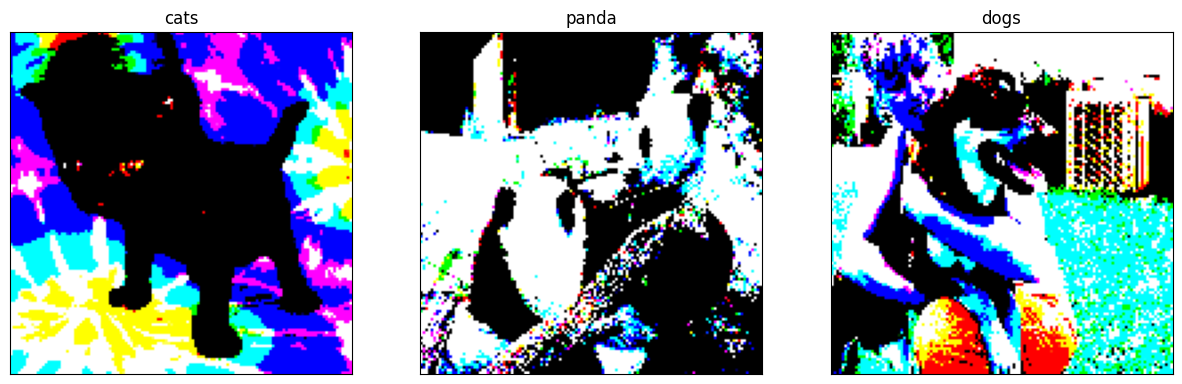

In [ ]:
clases = ['cats', 'panda', 'dogs']
_, axes = plt.subplots(1, 3, figsize=(15,15))
for i in range(len(clases)):
    axes[i].imshow(X_train[ y_train == i ][0])
    axes[i].set_title(clases[i])

    axes[i].xaxis.set_tick_params(labelbottom=False)
    axes[i].yaxis.set_tick_params(labelleft=False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()

In [ ]:
WORKSPACE_FOLDER_PATH = "/content/drive/MyDrive/callbacks IA 2024-1"
OUTPUT_FOLDER_NAME = "outputs"

In [ ]:
from keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os

def create_callbacks(output_folder_path, model_name, stopping_patience, lr_patience):

  csv_logger = CSVLogger(os.path.join(output_folder_path, f"training_metrics_{model_name}.csv"))
  early_stopping = EarlyStopping(patience=stopping_patience, verbose=1, restore_best_weights=True)
  model_checkpoint = ModelCheckpoint(os.path.join(output_folder_path, f"best_{model_name}.keras"),
    verbose=1,
    save_best_only=True
  )
  reduce_lr = ReduceLROnPlateau(factor=0.5, patience=lr_patience, min_lr=0.000003125)

  return [csv_logger, early_stopping, model_checkpoint, reduce_lr]

In [ ]:
transfer_learning_model2.compile(optimizer="adam",
                                loss='sparse_categorical_crossentropy',
                                metrics=['accuracy'])
output_folder_path = os.path.join(WORKSPACE_FOLDER_PATH, OUTPUT_FOLDER_NAME)
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)
callbacks = create_callbacks(
  output_folder_path,
  transfer_learning_model2.name,
  8,
  5
)

In [ ]:
history = transfer_learning_model2.fit(
    train_data_augmenter.flow(X_train, y_train, subset="training"),
    validation_data = train_data_augmenter.flow(X_train, y_train, subset="validation"),
    validation_split=0.2,
    epochs = 50,
    callbacks = callbacks,
    batch_size = 32,
    validation_batch_size = 32
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.8633 - loss: 0.3633
Epoch 1: val_loss improved from inf to 0.38991, saving model to /content/drive/MyDrive/callbacks IA 2024-1/outputs/best_functional_3.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 48s 566ms/step - accuracy: 0.8639 - loss: 0.3617 - val_accuracy: 0.9117 - val_loss: 0.3899 - learning_rate: 0.0010
Epoch 2/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9277 - loss: 0.1687
Epoch 2: val_loss improved from 0.38991 to 0.27977, saving model to /content/drive/MyDrive/callbacks IA 2024-1/outputs/best_functional_3.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 360ms/step - accuracy: 0.9277 - loss: 0.1691 - val_accuracy: 0.9133 - val_loss: 0.2798 - learning_rate: 0.0010
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9453 - loss: 0.1323
Epoch 3: val_loss did not improve from 0.27977
57/57 ━━━━━━━━━━━━━━━━━━━━ 33s 210ms/step - accuracy: 0.9454 - loss: 0.1324 - val_accuracy: 0.9217 - val_loss: 0.2997 - learning_rate: 0.001

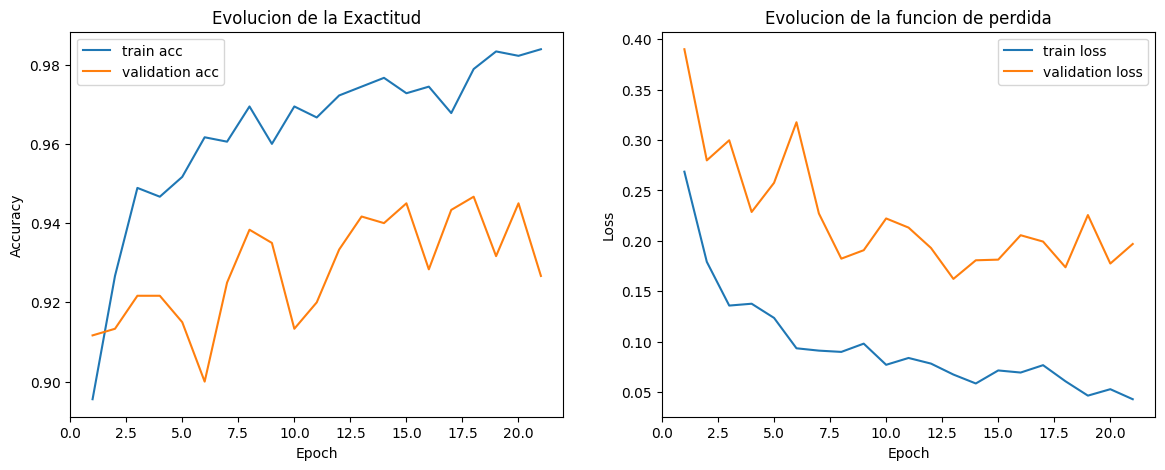

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

history = history.history
epochs = range(1, len(history["accuracy"]) + 1)

# plot acurracy
ax1.plot(epochs, history["accuracy"], label="train acc")
ax1.plot(epochs, history["val_accuracy"], label="validation acc")

ax1.legend()
ax1.set_title("Evolucion de la Exactitud")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")


# plot loss
ax2.plot(epochs, history["loss"], label="train loss")
ax2.plot(epochs, history["val_loss"], label="validation loss")

ax2.legend()
ax2.set_title("Evolucion de la funcion de perdida")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")

plt.show()


ENTRENAMIENTO Y VALIDACION:

75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       800
           1       0.99      1.00      1.00       800
           2       0.97      0.99      0.98       800

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400


PRUEBA:

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       200
           1       0.99      0.99      0.99       200
           2       0.94      0.97      0.95       200

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



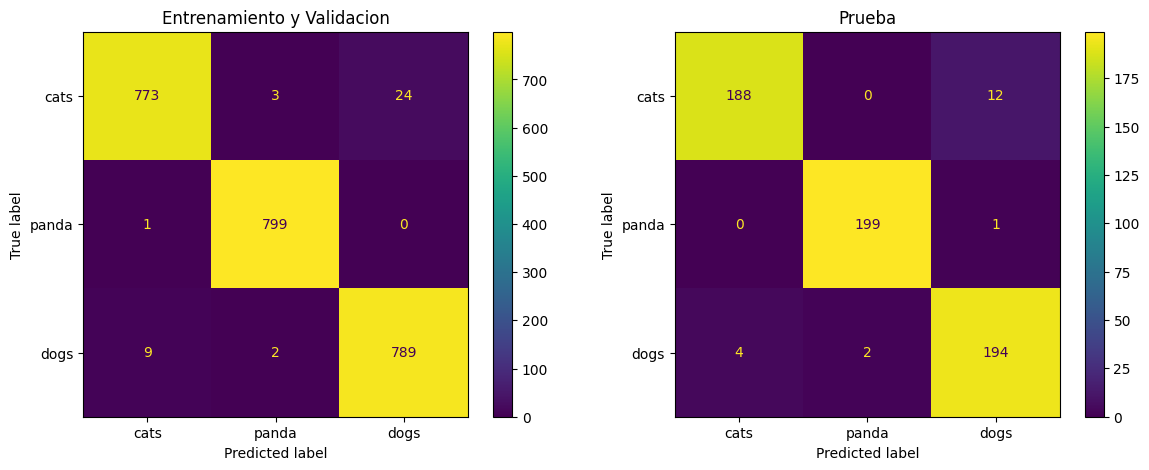

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

print("\nENTRENAMIENTO Y VALIDACION:\n")

y_pred = np.argmax(transfer_learning_model2.predict(X_train), axis=1)

print(classification_report(y_train, y_pred))
ConfusionMatrixDisplay.from_predictions(
    y_true = y_train,
    y_pred = y_pred,
    display_labels = clases,
    ax = ax1
)
ax1.set_title("Entrenamiento y Validacion")

print("\nPRUEBA:\n")

y_pred = np.argmax(transfer_learning_model2.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(
    y_true = y_test,
    y_pred = y_pred,
    display_labels = clases,
    ax = ax2
)
ax2.set_title("Prueba")

plt.show()